In [3]:
# %pip install pandas
# %pip install scikit-learn
# %pip install matplotlib
# %pip install seaborn
# %pip install xgboost
# %pip install lightgbm
# %pip install catboost
# %pip install mlflow

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR

In [2]:
df=pd.read_csv("/Users/logith/Downloads/e_shop_clothing_cleaned.csv")

In [3]:
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,1,29,2,2,B31,9,5,1,57,1,2
2,2008,4,1,1,21,3,2,B17,6,6,2,38,2,1
3,2008,4,1,1,21,4,1,A34,2,6,1,38,2,2
4,2008,4,1,1,9,5,3,C21,14,1,1,57,1,2


In [4]:
df.tail()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
165469,2008,8,13,57,29,24012,4,P69,9,5,1,43,1,4
165470,2008,8,13,58,29,24012,4,P69,9,5,1,43,1,4
165471,2008,8,13,59,29,24012,4,P57,4,1,1,43,1,4
165472,2008,8,13,60,29,24012,4,P70,6,6,2,38,1,4
165473,2008,8,13,61,29,24012,4,P70,6,6,2,38,1,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [6]:
df.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [7]:
column_list_with_outlier=['order','price']

In [8]:
df.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


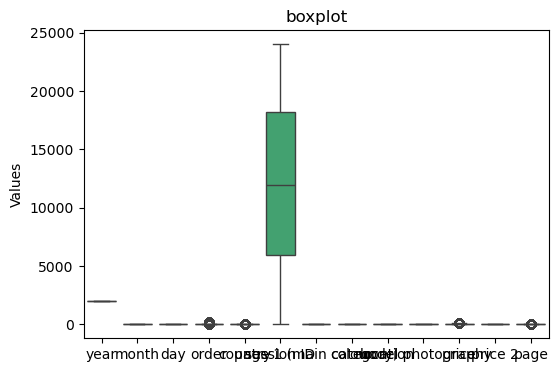

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df)

# Add title and labels
plt.title("boxplot")
plt.ylabel("Values")

# Show the plot
plt.show()

In [18]:
for i in column_list_with_outlier:
    

    # Calculate Q1, Q3, and IQR for the chosen i
    Q1 = df[i].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[i].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers in the chosen i
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    mean_without_outliers = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)][i].mean()
    mean_without_outliers=round(mean_without_outliers)
    print(i,mean_without_outliers)
    print('***************************')

    print("Detected Outliers in '{}':\n".format(i), outliers)

order 7
***************************
Detected Outliers in 'order':
         year  month  day  order  country  session ID  page 1 (main category)  \
3054    2008      4    1     28        9          49                       1   
3055    2008      4    1     28       29         125                       2   
3056    2008      4    1     28       29         157                       4   
3057    2008      4    1     28       34         168                       3   
3058    2008      4    1     28       29         184                       3   
...      ...    ...  ...    ...      ...         ...                     ...   
165469  2008      8   13     57       29       24012                       4   
165470  2008      8   13     58       29       24012                       4   
165471  2008      8   13     59       29       24012                       4   
165472  2008      8   13     60       29       24012                       4   
165473  2008      8   13     61       29       24012 

In [19]:
df.loc[df["order"] >= 32 , "order"] = 7
df.loc[df["price"] >= 82 , "price"] = 43

In [20]:
df.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,7.393004,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.349281,1.488167,1.710166
std,0.0,1.328160,8.830374,6.599671,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,11.844903,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,10.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,31.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,77.000000,2.000000,5.000000


In [21]:
df['country'].value_counts()

country
29    133963
9      18003
24      4091
46      2522
44      1385
16       834
21       811
34       716
41       684
3        256
27       227
12       210
42       170
37       163
10       152
31       144
22       144
28       139
38       137
15       125
11       115
25        71
2         58
32        49
23        46
14        43
39        34
43        31
19        29
17        23
36        19
18        18
20        10
7          9
47         7
45         6
6          5
30         5
5          4
33         3
1          3
35         3
13         2
26         2
40         1
4          1
8          1
Name: count, dtype: int64

In [15]:
non_european = [
    'USA', 'India', 'Mexico', 'Australia', 'Cayman Islands', 'British Virgin Islands', 
    'Faroe Islands', 'Christmas Island'
]
domains = ['net (.net)', 'com (.com)', 'org (*.org)', 'biz (.biz)', 'int (.int)', 'unidentified']
df['country'] = df['country'].replace(non_european + domains, 'Others')

In [16]:
def categorize_region(country):
    central_europe = ['Poland', 'Czech Republic', 'Slovakia', 'Hungary']
    northern_europe = ['Sweden', 'Denmark', 'Norway', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Iceland', 'Ireland', 'United Kingdom']
    western_europe = ['Germany', 'France', 'Netherlands', 'Belgium', 'Switzerland', 'Luxembourg', 'Austria']
    southern_europe = ['Italy', 'Spain', 'Portugal', 'Greece', 'San Marino', 'Croatia', 'Slovenia', 'Cyprus']
    eastern_europe = ['Romania', 'Russia', 'Ukraine', 'Bulgaria', 'Moldova']
    others=['Others']

    if country in central_europe:
        return 'Central Europe'
    elif country in northern_europe:
        return 'Northern Europe'
    elif country in western_europe:
        return 'Western Europe'
    elif country in southern_europe:
        return 'Southern Europe'
    elif country in eastern_europe:
        return 'Eastern Europe'
    elif country in others:
        return 'Others'
     


df['Region'] = df['country'].apply(categorize_region)

In [25]:
df['month'].unique()

array([4, 5, 6, 7, 8])

In [26]:
def get_season(month):
    if month in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif month in ['Mar', 'Apr', 'May']:
        return 'Spring'
    elif month in ['Jun', 'Jul', 'Aug']:
        return 'Summer'
    elif month in ['Sep', 'Oct', 'Nov']:
        return 'Fall'
    else:
        return 'Unknown'

df['season'] = df['month'].apply(get_season)


print(df)

        year  month  day  order  country  session ID  page 1 (main category)  \
0       2008      4    1      1       29           1                       1   
1       2008      4    1      1       29           2                       2   
2       2008      4    1      1       21           3                       2   
3       2008      4    1      1       21           4                       1   
4       2008      4    1      1        9           5                       3   
...      ...    ...  ...    ...      ...         ...                     ...   
165469  2008      8   13      7       29       24012                       4   
165470  2008      8   13      7       29       24012                       4   
165471  2008      8   13      7       29       24012                       4   
165472  2008      8   13      7       29       24012                       4   
165473  2008      8   13      7       29       24012                       4   

       page 2 (clothing model)  colour 

In [27]:
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,Region,season
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1,None,Unknown
1,2008,4,1,1,29,2,2,B31,9,5,1,57,1,2,None,Unknown
2,2008,4,1,1,21,3,2,B17,6,6,2,38,2,1,None,Unknown
3,2008,4,1,1,21,4,1,A34,2,6,1,38,2,2,None,Unknown
4,2008,4,1,1,9,5,3,C21,14,1,1,57,1,2,None,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,7,29,24012,4,P69,9,5,1,43,1,4,None,Unknown
165470,2008,8,13,7,29,24012,4,P69,9,5,1,43,1,4,None,Unknown
165471,2008,8,13,7,29,24012,4,P57,4,1,1,43,1,4,None,Unknown
165472,2008,8,13,7,29,24012,4,P70,6,6,2,38,1,4,None,Unknown


/var/folders/_6/53b85k5n0r9gc_jmg55ls1hw0000gn/T/ipykernel_2414/3261304717.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Price_2")


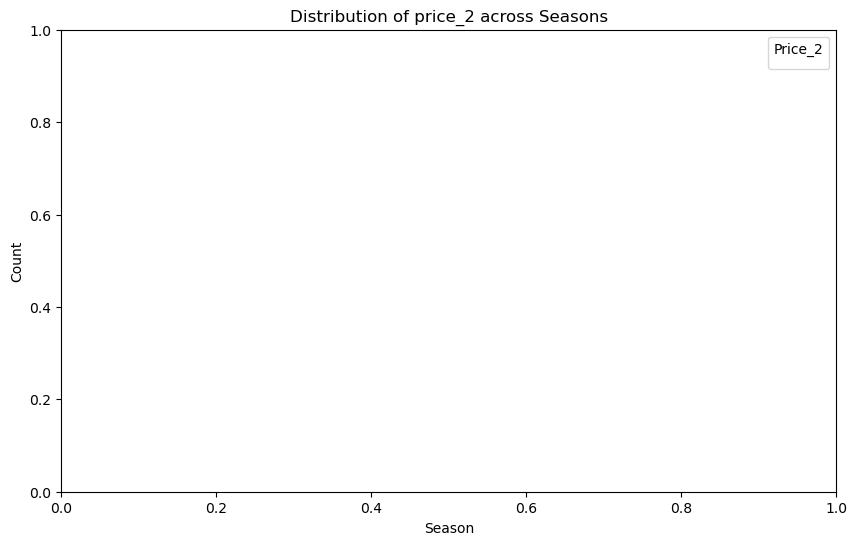

"Sales in both summer and spring season are same but 'no' rates is higher in spring \nseason we can give more discounts in products that will incease the sales in spring season \nmore than summer."

In [31]:
plt.figure(figsize=(10, 6))

# Add labels and title
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Distribution of price_2 across Seasons")
plt.legend(title="Price_2")
plt.show()
"""Sales in both summer and spring season are same but 'no' rates is higher in spring 
season we can give more discounts in products that will incease the sales in spring season 
more than summer."""

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
 14  Region              

In [18]:
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,Region
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1,None
1,2008,4,1,1,29,2,2,B31,9,5,1,57,1,2,None
2,2008,4,1,1,21,3,2,B17,6,6,2,38,2,1,None
3,2008,4,1,1,21,4,1,A34,2,6,1,38,2,2,None
4,2008,4,1,1,9,5,3,C21,14,1,1,57,1,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,57,29,24012,4,P69,9,5,1,43,1,4,None
165470,2008,8,13,58,29,24012,4,P69,9,5,1,43,1,4,None
165471,2008,8,13,59,29,24012,4,P57,4,1,1,43,1,4,None
165472,2008,8,13,60,29,24012,4,P70,6,6,2,38,1,4,None


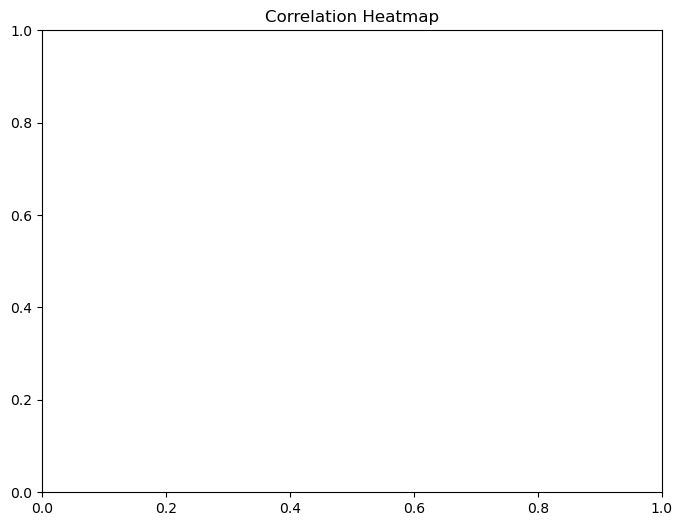

In [21]:

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.title("Correlation Heatmap")
plt.show()